### Random Walks on Graphs

Some diffusion processes on graphs are easy to implement. All we will need to make a variable diffuse over our network will be 
* prob, a vector recording out diffusion variable
* A, The Adjacency Matrix
* D, The Degree Matrix(and its inverse)

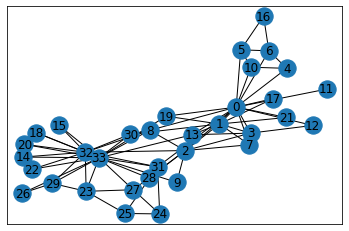

In [6]:
import networkx as nx
G=nx.karate_club_graph()
position = nx.spring_layout(G)
nx.draw_networkx(G, pos=position)

In [7]:
import numpy as np
A=nx.linalg.adjacency_matrix(G).todense()
deg=np.array(A).sum(axis=0)
D=np.diag(deg)
Dinv=np.linalg.inv(D)

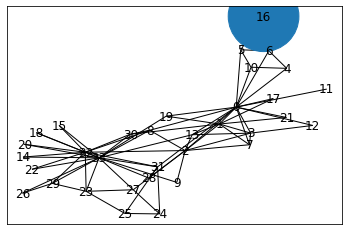

In [8]:
prob=np.zeros((34,1))
prob[16]=1.
nx.draw_networkx(G,pos=position, node_size=prob*5000)

the recursive formula for the next state with be new_prob = A(D^-1)old_prob
here I'll repeat the process 200 times in order to reach a state close to the equilibrium.

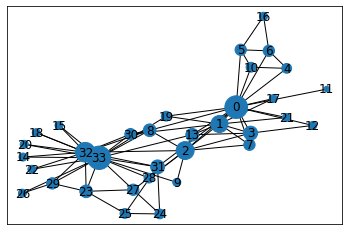

In [9]:
for i in range(200):
    prob = np.dot(np.dot(A,Dinv),prob)

nx.draw_networkx(G,pos=position, node_size=list(prob*5000))

### The Equilibrium

The equilibrium limit is the value of prob such that the new_prob = old_prob
* With only some algebra, we get L(D^-1)prob=0 
* This is an Eigenvalue problem with (D^-1)prob as the eigenvector with eigenvalue 0
* L for a graph with only one connected component has only one such eigenvector; the vector **1**
* Therefore after normalizing prob=D**1**/(sum of all degrees)

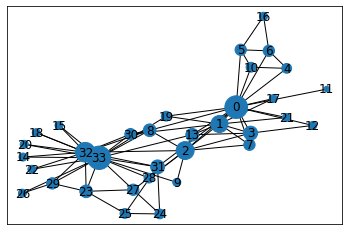

In [10]:
M=0
for k, d in G.degree:
    M+=d
nx.draw_networkx(G,pos=position, node_size=[d*5000/M for k, d in G.degree])

Look how similar the distributions are!!!